In [97]:
#Import pandas and scikitlearn for Machine Learning Models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Li
nearRegression, Ridge, HuberRegressor, ElasticNetCV

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
import numpy as np

# Pickle saves the model
import pickle

import math


In [156]:
# Read in cleaned results
df = pd.read_csv('bike_weather_data.csv')

In [157]:
df = df.loc[df['number'] == 36]

In [158]:
# Transform to a 2D array and assign features and target
# Available bikes as target. Another model can be done for available stands if needed.
features = df[['number', 'hour', 'minute',
              'main_temp', 'main_wind_speed', 'main_rain_volume_1h', 'main_snow_volume_1h',
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
              'Sunday', 'clouds', 'atmosphere', 'snow', 'light_rain',
              'rain', 'light_drizzle', 'drizzle', 'thunderstorm']].values
targets = df['available_bikes'].values


In [159]:
# Cycles through neural network options and selects the most accurate.
def mlp_regressor_grid_search():
    est = MLPRegressor(activation= 'logistic')
    sizes = []
    for size1 in range(5, 20, 5):
        sizes.append(size1)

    param_grid = dict(solver=['lbfgs'], #'sgd','adam'
                      learning_rate=['adaptive','invscaling'],
                      alpha=[0.0001], # [0.0005, 0.001, 0.005, 0.01]
                      max_iter=[200], #np.arange(200, 300, 20)
                      tol=[0.0001], #np.arange(0.00001, 0.0001, 0.00001)
                      hidden_layer_sizes=sizes)
    return GridSearchCV(est, param_grid=param_grid, n_jobs=1, verbose=100)


In [160]:
models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]


In [161]:
# Split the data set into test and training data.
def split_by_position(features, targets):
    """
    train 0.80
    test 0.20
    """
    len_train = int(0.80 * len(features))
    train_features = features[0:len_train]
    train_targets = targets[0:len_train]
    test_features = features[len_train:]
    test_targets = targets[len_train:]
    return train_features, test_features, train_targets, test_targets


In [162]:
# Assign training features and target and test features and target
train_features, test_features, train_targets, test_targets = split_by_position(features, targets)



In [163]:
# Normalise the features for training
scaler = StandardScaler()
scaler.fit(train_features)
scaled_train_features = scaler.transform(train_features)


In [164]:
# Tests training features and targets with different neural network options
est = mlp_regressor_grid_search()
est.fit(scaled_train_features, train_targets)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs, tol=0.0001 
[CV]  alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs, tol=0.0001, score=0.03539439879547612, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs, tol=0.0001 
[CV]  alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs, tol=0.0001, score=0.2871929072956073, total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs, tol=0.0001 
[CV]  alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfg

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'solver': ['lbfgs'], 'learning_rate': ['adaptive', 'invscaling'], 'alpha': [0.0001], 'max_iter': [200], 'tol': [0.0001], 'hidden_layer_sizes': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [165]:
# Print best hyper parameters for model
print(est.best_estimator_)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [166]:
# Print score for best estimator on test data
print(est.score(scaler.transform(test_features), test_targets))


0.6276261279150793


In [167]:
# Test algorithms for performance.
for model in models:
    est = model
    est.fit(scaled_train_features, train_targets)
    print(est.score(scaler.transform(test_features), test_targets))

-0.044245757327585185
-0.04567192334787395
-0.11846466226799501
0.0775888871177991
0.5720377558759882


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7180158494880762
0.7142288306078874
0.671868740338917


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6647166480279441


ExtraTrees - no alteration

0.11825679195687633

For all models:

0.012663067202476341
0.012660621258087978
-0.029618304713565413

0.012624214970299086
0.6871957436347627

0.8140946056581033
0.23435545657540113

0.7898846535251685
0.7895787539140001

In [168]:
# Get mean square error regression loss
est = GradientBoostingRegressor()
est.fit(scaled_train_features, train_targets)
test_predictions = est.predict(scaler.transform(test_features))
mean_squared_error(test_targets, test_predictions)

# 11.49 for station 54
# for all stations 21.6

54.33561662165028

In [169]:
mean_absolute_error(test_targets, test_predictions)
# 2.086 for station 54
# for all stations 2.84

5.7372042841209545

In [170]:
# Use features to print a prediction
# features = df[['number', 'hour', 'minute',
 #  'main_temp', 'main_wind_speed', 'main_rain_volume_1h', 'main_snow_volume_1h',
#   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
#   'Sunday', 'clouds', 'atmosphere', 'snow', 'light_rain',
#   'rain', 'light_drizzle', 'drizzle', 'thunderstorm']].values
est = GradientBoostingRegressor()
est.fit(scaled_train_features, train_targets)
predict_data = [[54,19, 0,277.31,9.3, 0.51, 0, 0, 0, 1, 0, 0, 0, 0, 
                 0,0,0,1,0,0,0,0]]
scaled_predict = scaler.transform(predict_data)




prediction = est.predict(scaled_predict)
print("PREDICTION:", math.floor(prediction))


PREDICTION: 3


In [171]:
# Using elastic net CV as seems to be the best fit currently
# Pickle saves the model
# est = GradientBoostingRegressor()
# est.fit(scaled_train_features, train_targets)
# filename_est = '../app/model.sav'
# filename_scaler = '../app/scaler.sav'
# pickle.dump(est, open(filename_est, 'wb'))
# pickle.dump(scaler, open(filename_scaler, 'wb'))


In [172]:
print(test_targets)

[ 9.  9.  9. ... 33. 34. 35.]


In [173]:
print(np.round(test_predictions))

[ 3.  3.  3. ... 31. 31. 31.]


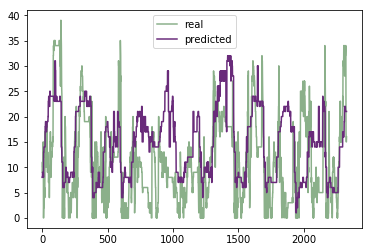

In [186]:
plt.plot(test_targets, label='real', color='#8bb08a')
plt.plot(np.round(test_predictions), label='predicted', color='#692b7a')
plt.legend()

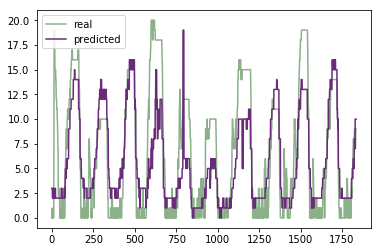

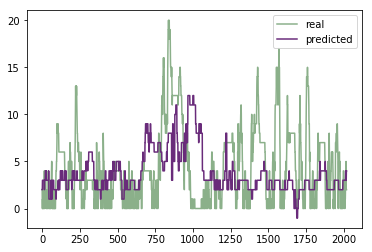

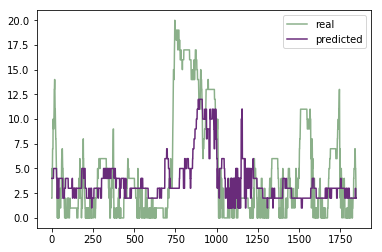

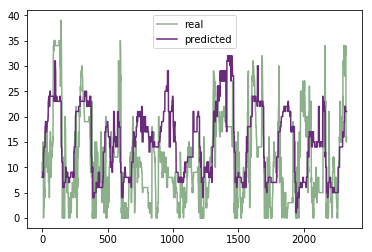

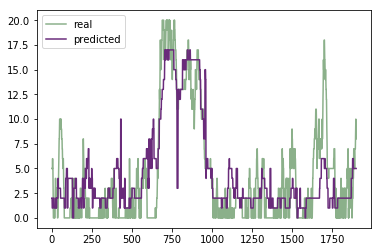

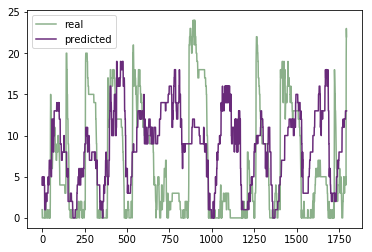

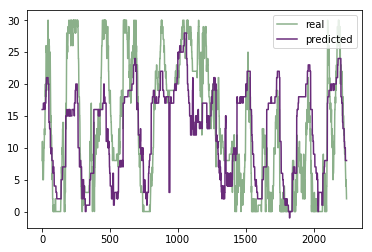

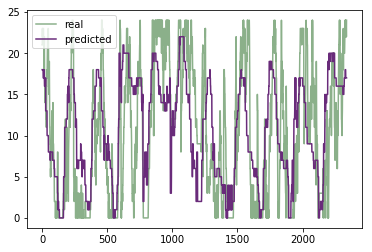

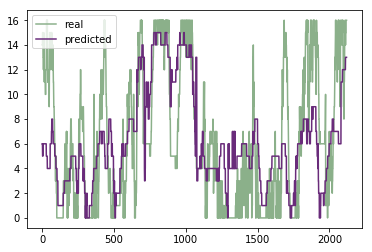

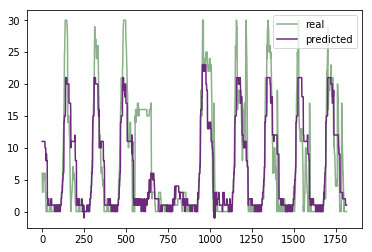

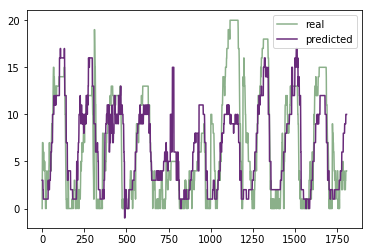

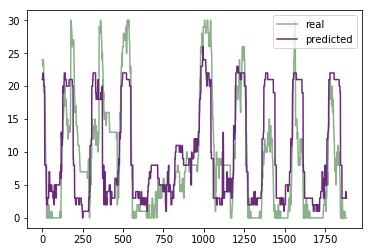

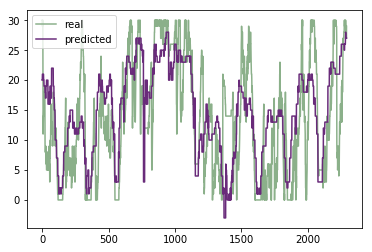

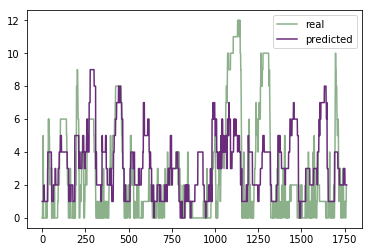

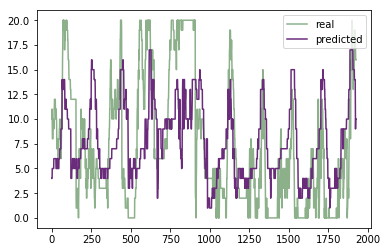

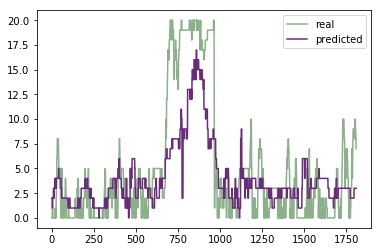

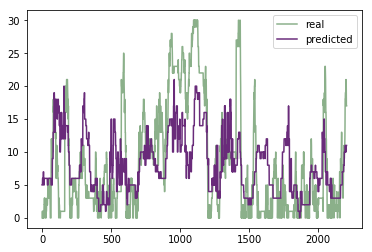

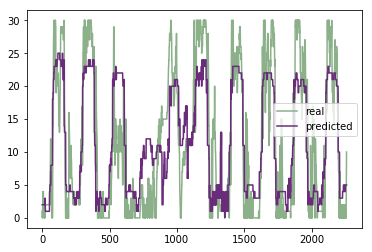

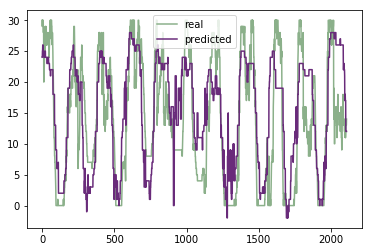

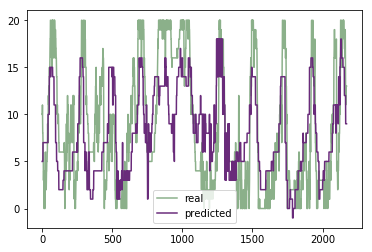

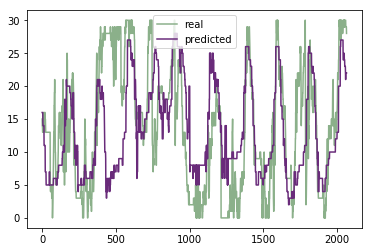

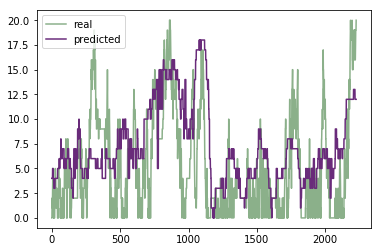

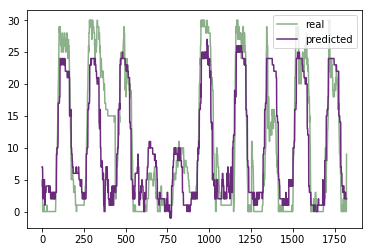

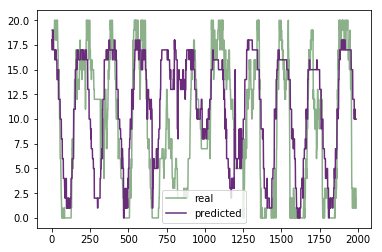

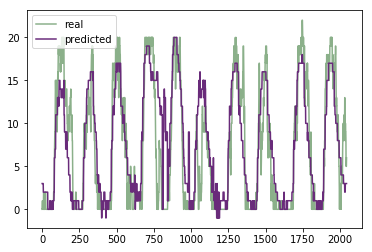

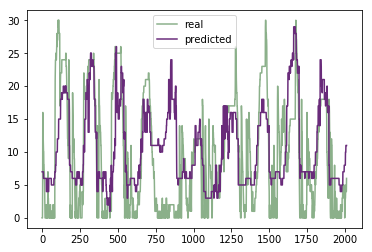

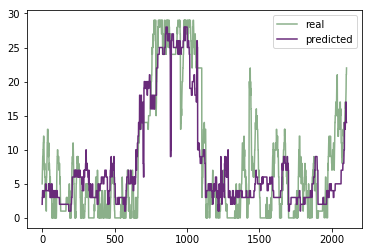

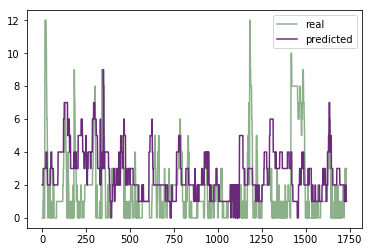

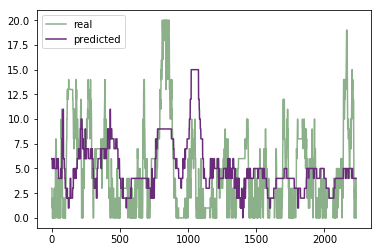

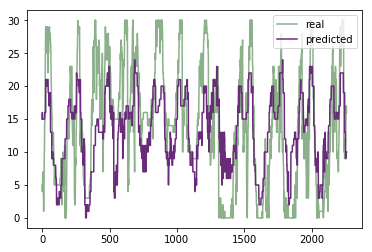

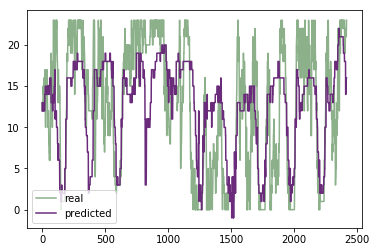

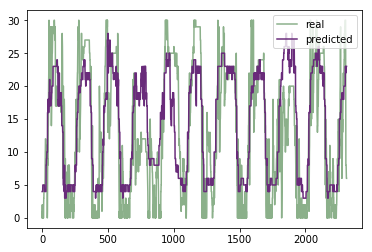

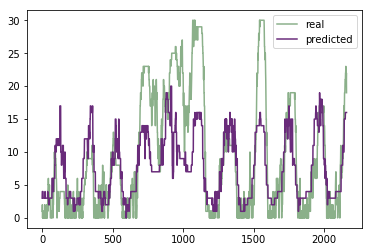

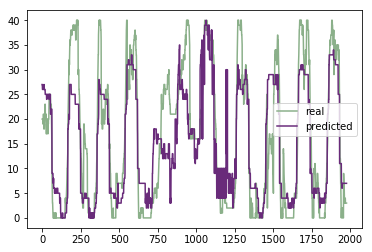

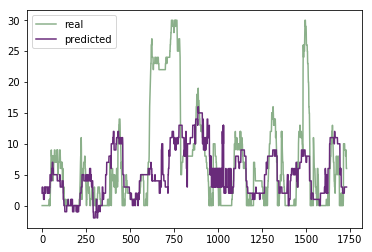

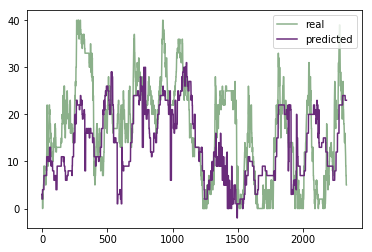

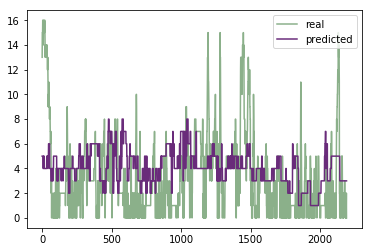

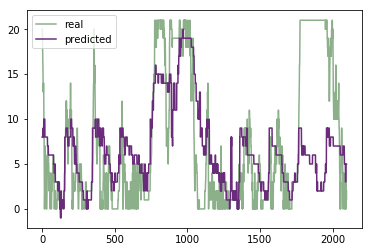

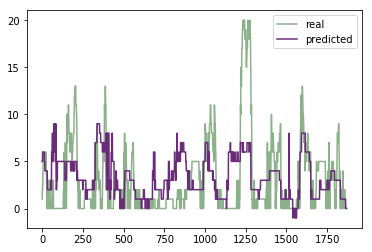

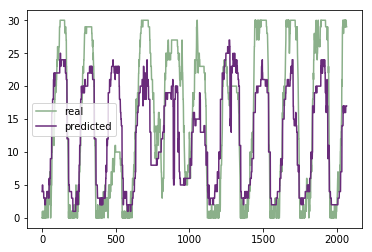

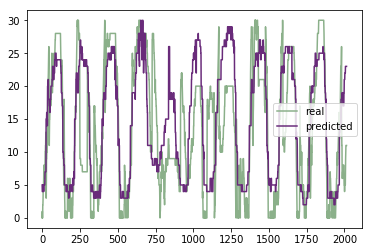

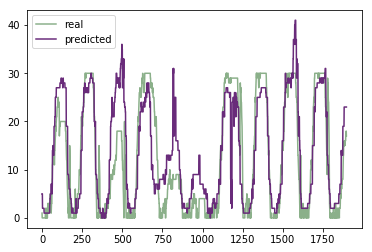

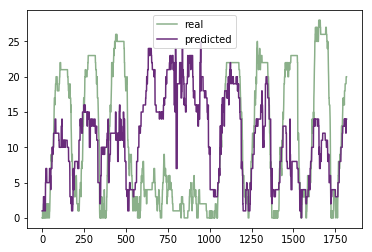

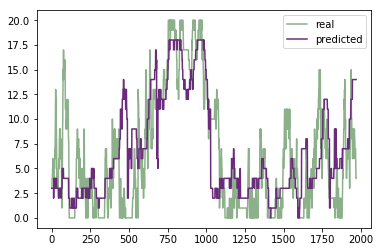

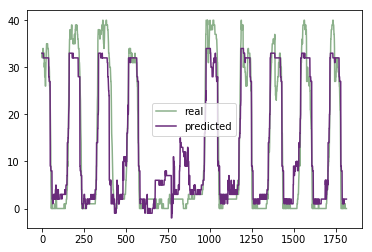

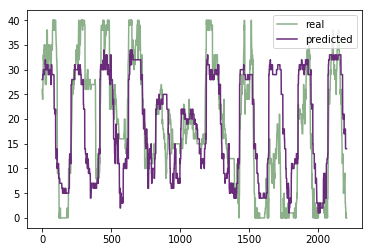

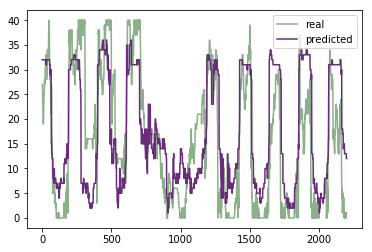

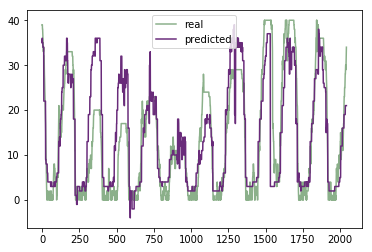

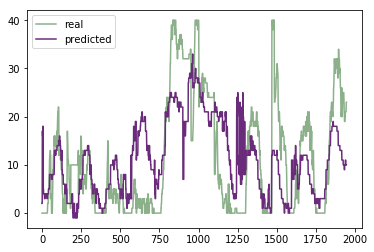

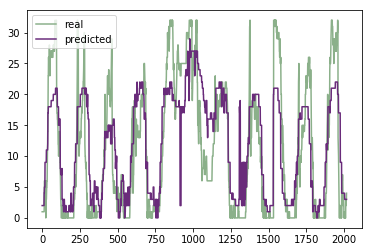

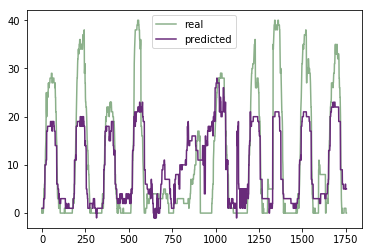

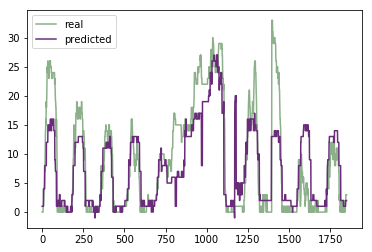

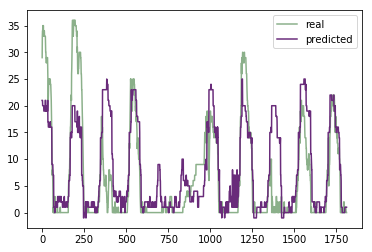

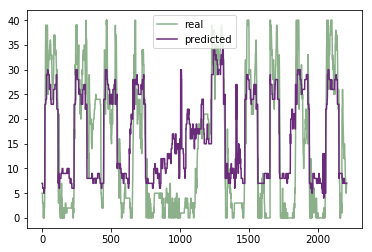

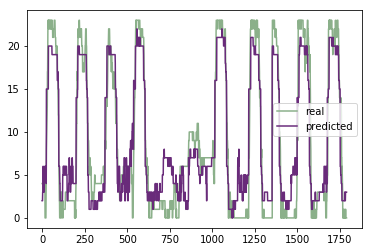

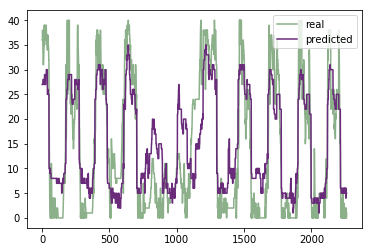

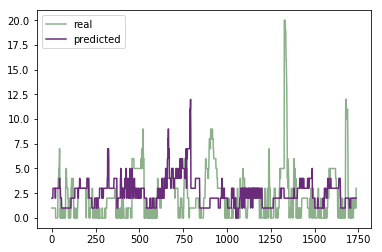

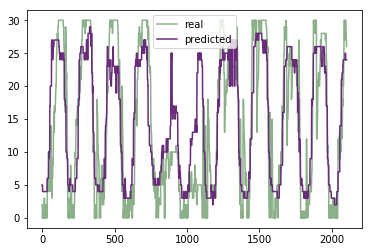

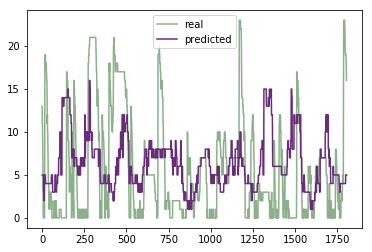

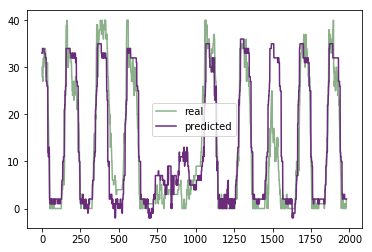

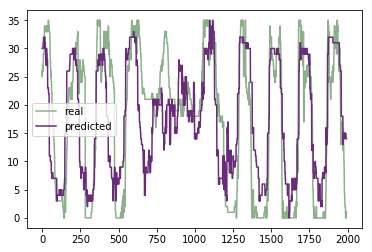

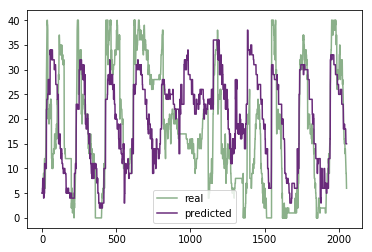

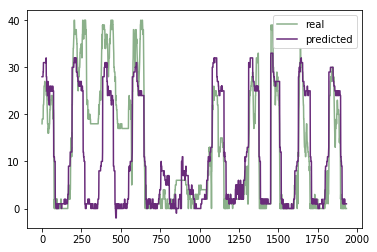

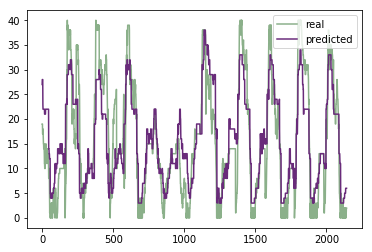

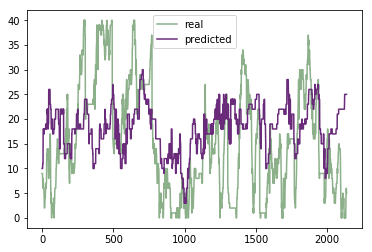

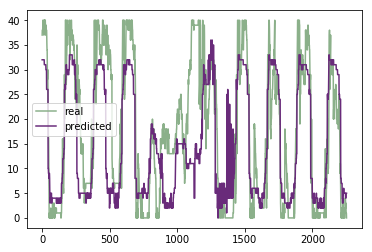

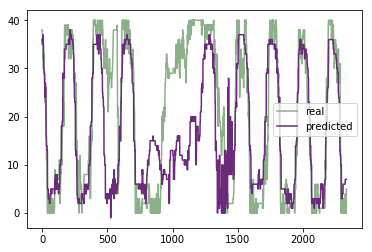

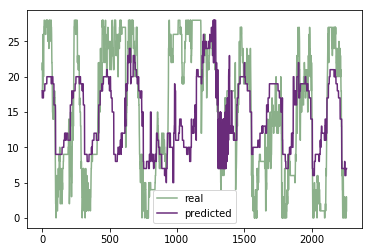

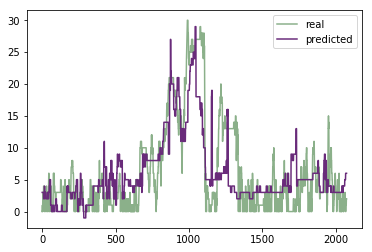

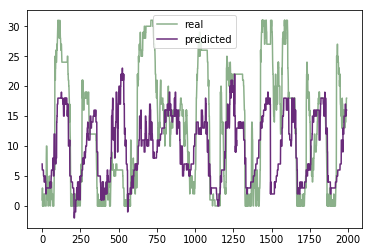

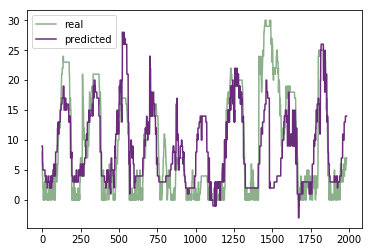

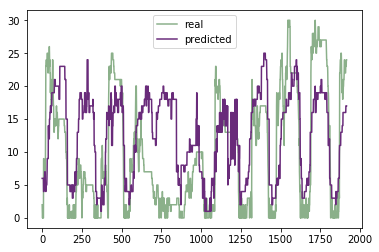

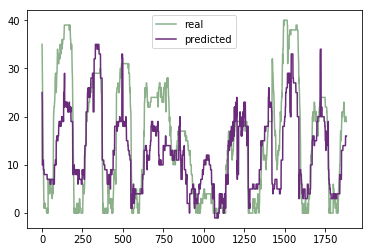

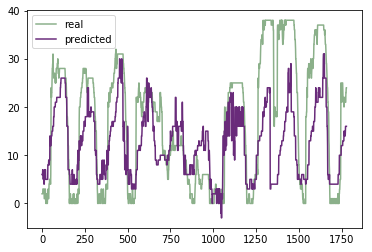

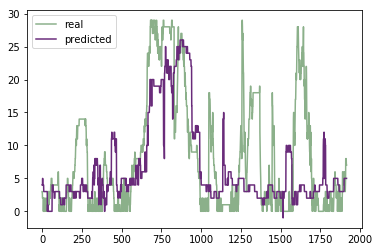

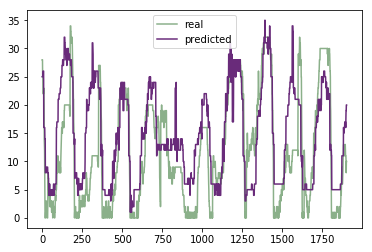

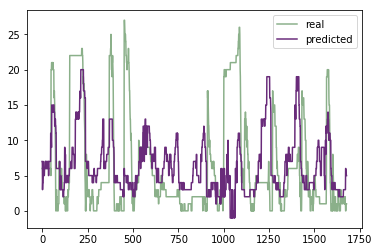

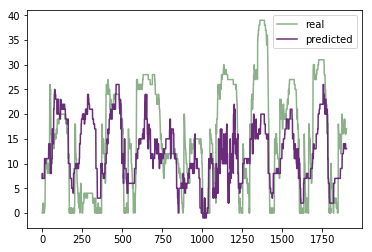

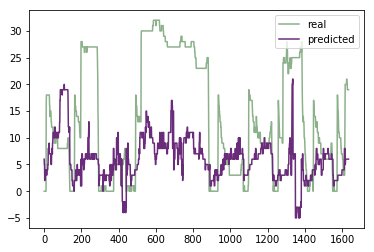

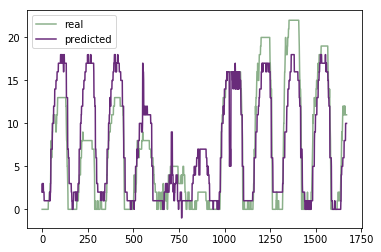

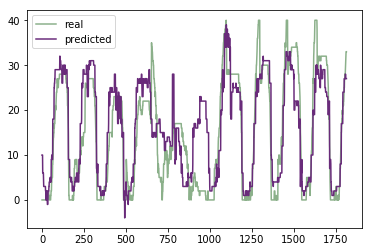

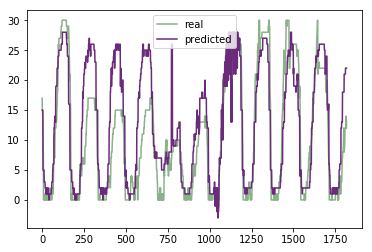

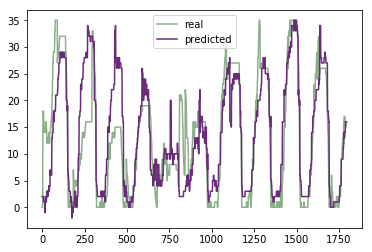

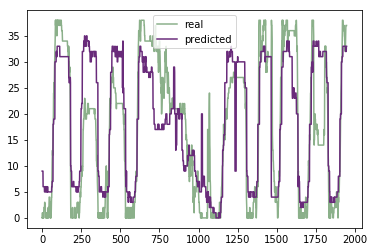

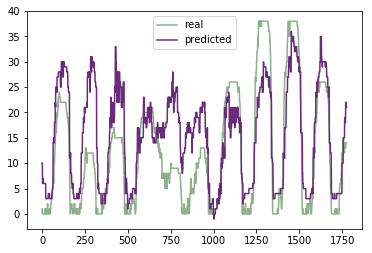

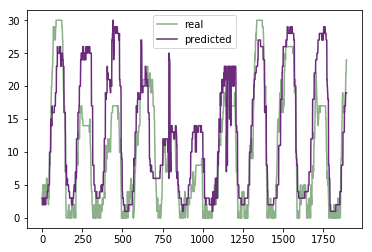

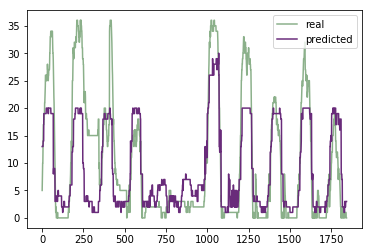

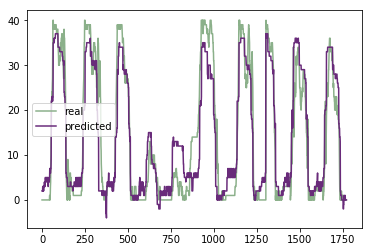

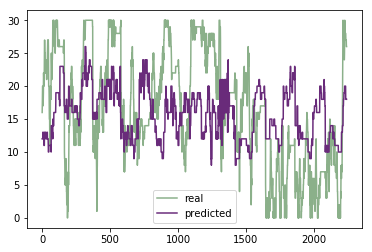

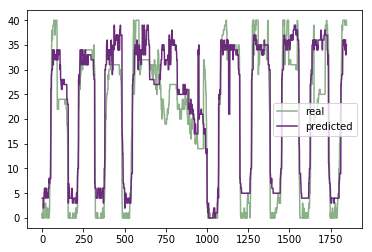

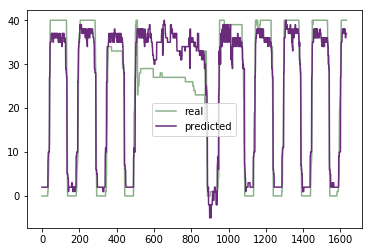

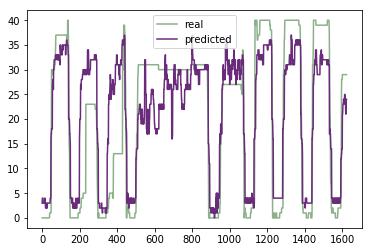

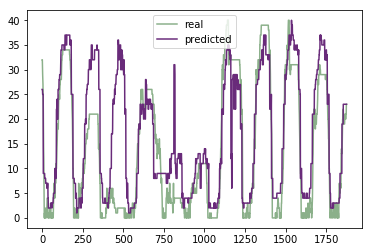

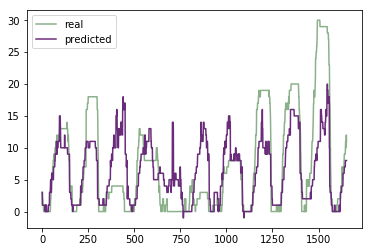

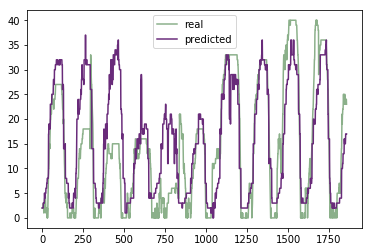

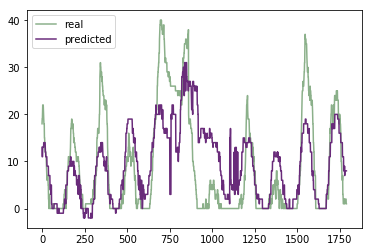

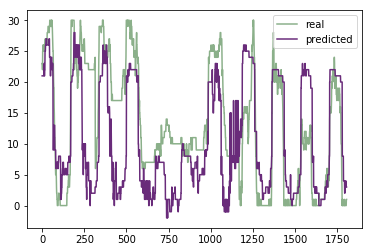

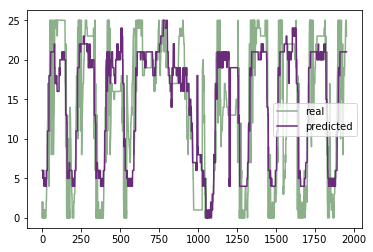

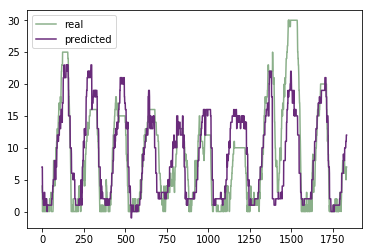

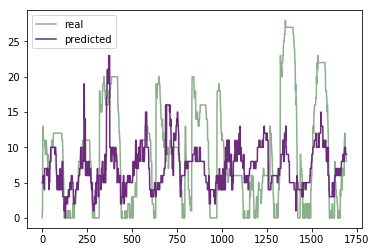

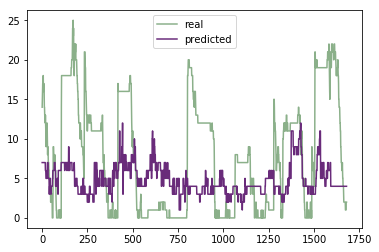

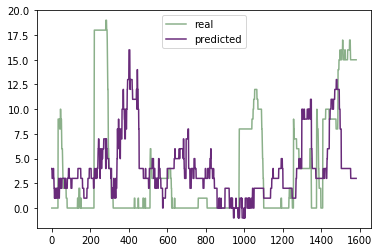

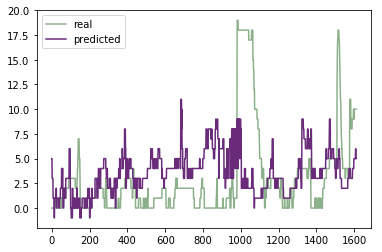

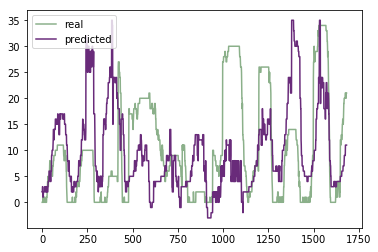

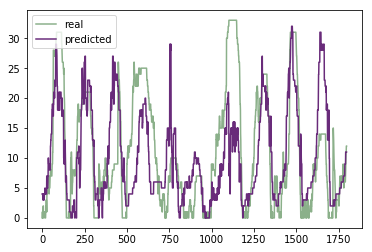

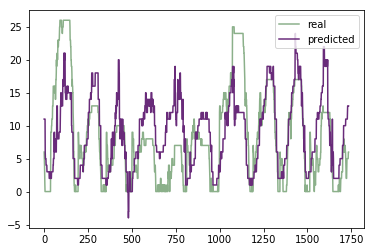

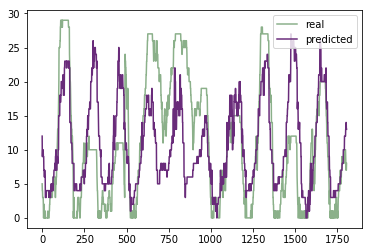

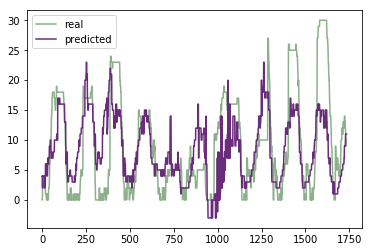

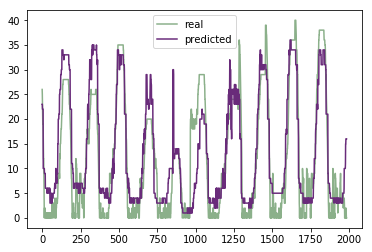

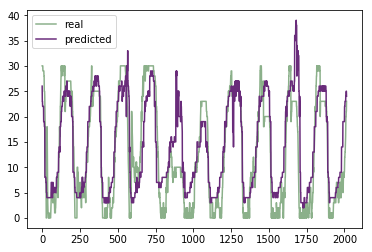

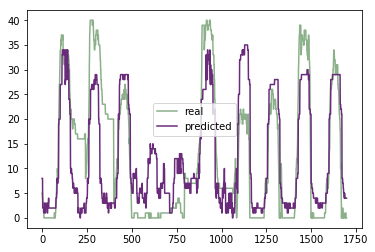

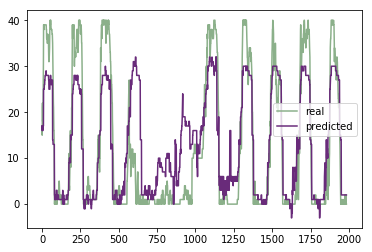

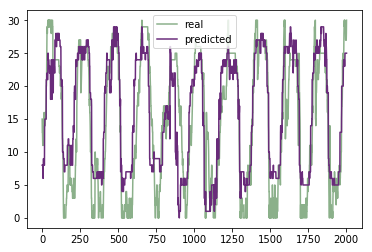

In [188]:
for station in range (2,116):
    if station != 20:
        
        df = pd.read_csv('bike_weather_data.csv')
        df = df.loc[df['number'] == station]
        
        features = df[['number', 'hour', 'minute',
              'main_temp', 'main_wind_speed', 'main_rain_volume_1h', 'main_snow_volume_1h',
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
              'Sunday', 'clouds', 'atmosphere', 'snow', 'light_rain',
              'rain', 'light_drizzle', 'drizzle', 'thunderstorm']].values
        targets = df['available_bikes'].values
        
        train_features, test_features, train_targets, test_targets = split_by_position(features, targets)
        scaler = StandardScaler()
        scaler.fit(train_features)
        scaled_train_features = scaler.transform(train_features)
        est = GradientBoostingRegressor()
        est.fit(scaled_train_features, train_targets)
        test_predictions = est.predict(scaler.transform(test_features))
        
        plt.plot(test_targets, label='real', color='#8bb08a')
        plt.plot(np.round(test_predictions), label='predicted', color='#692b7a')
        plt.legend()
        plt.show()
        